In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

SCRIPT_DIR = os.getcwd()
REPO_DIR = os.path.dirname(SCRIPT_DIR)
sys.path.append(REPO_DIR)

from utils import FileManager
from frame import Frame
from visualizer import generic_o3d_vis
from world import World

RUN_DIR_PATH = os.path.join(REPO_DIR, "sample_data", "run_01")

if __name__ == "__main__":
    fm = FileManager(RUN_DIR_PATH)
    world = World()

    start_img_idx = 200
    end_img_idx = 220

    trajectory = []

    for idx, pair in enumerate(fm.paired_files[start_img_idx:end_img_idx], start=0):
        frame = Frame(
            frame_idx=idx,
            depth_path=pair.depth_path,
            color_path=pair.color_path,
            raw_timestamp=pair.raw_timestamp,
            recording_time_str=pair.recording_time_str
        )
        world.add_frame(frame)
        
        position = frame.pose[:3, 3]
        trajectory.append(position)

    trajectory = np.array(trajectory)



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


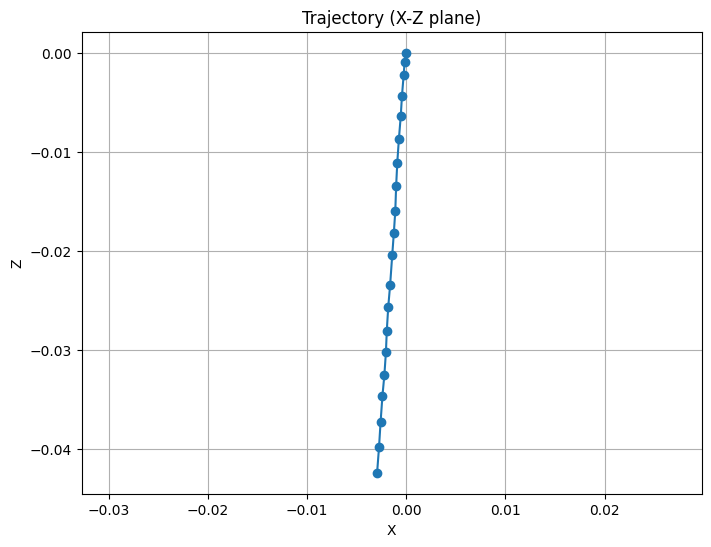

In [2]:

plt.figure(figsize=(8,6))
plt.plot(trajectory[:,0], trajectory[:,2], marker='o', linestyle='-')  # type: ignore
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Trajectory (X-Z plane)')
plt.grid(True)
plt.axis('equal')
plt.show()

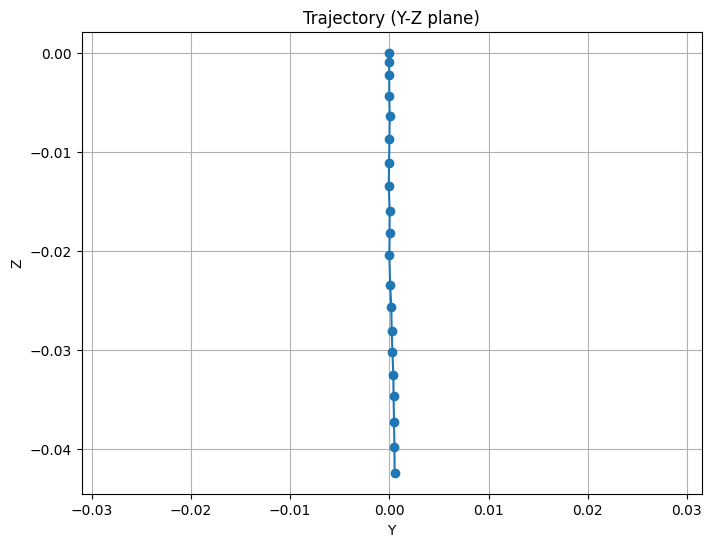

In [3]:
plt.figure(figsize=(8,6))
plt.plot(trajectory[:,1], trajectory[:,2], marker='o', linestyle='-') # type: ignore
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Trajectory (Y-Z plane)')
plt.grid(True)
plt.axis('equal')
plt.show()